# NAC3 - Aprendizado de máquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes             | RM             | Turma   |
| :------------------------------- | :------------- | :-----: |
| Gabriel Siqueira Petillo         | RM 81238       |  4SIA   |
| Jean Jacques Nascimento Barros   | RM 81524       |  4SIA   |


## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [457]:
#Seu Código aqui....
url_db= 'Automobile.csv'
df = pd.read_csv(url_db, header=0)

pd.set_option('display.max_columns', 75)
df.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

- **symboling**: grau de risco de seguro
- **normalized_losses**: média de depreciação do veículo ao ano
- **make**: marca fabricante
- **fuel_type**: tipo de combustível
- **aspiration**: forma de mistura ar-combustível
- **number_of_doors**: quantidade de portas
- **body_style**: tipo de carroceria
- **drive_wheels**: tipo de tração
- **engine_location**: posição do motor
- **wheel_base**: distância entre os eixos
- **length**: comprimento do veículo
- **width**: largura do veículo
- **height**: peso do veículo
- **curb_weight**: peso padrão do veículo (sem carga)
- **engine_type**: tipo de motor
- **number_of_cylinders**: quantidade de cilindros
- **engine_size**: tamanho do motor
- **fuel_system**: sistema de injeção de combustível
- **bore**: diâmetro do cilindro do motor
- **stroke**: distância de movimento do pistão em um ciclo
- **compression_ratio**: razão entre o volume do cilindro e a câmara de combustão
- **horsepower**: cavalos de potência (HP)
- **peak_rpm** ápice de rotações por minuto (RPM) do motor,
- **city_mpg**: rendimento de milhas por galão de combustível em ambiente urbano
- **highway_mpg**: rendimento de milhas por galão de combustível em rodovias
- **price**: preço do veículo ao consumidor






### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

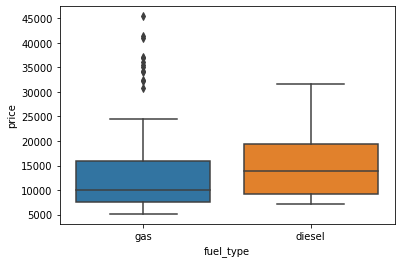

In [458]:
# Relação entre o tipo de combustível e o preço
sns.boxplot(x='fuel_type', y='price', data=df)
plt.show()

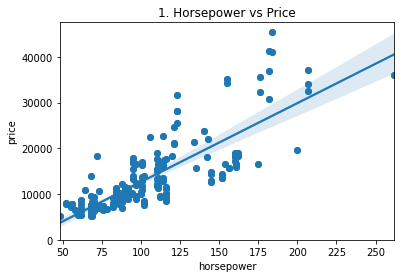

In [459]:
x = df['horsepower']
y = df['price']

plt.scatter(x, y)

sns.regplot(x='horsepower', y='price', data=df)
plt.title('1. Horsepower vs Price')
plt.ylim(0)
plt.show()

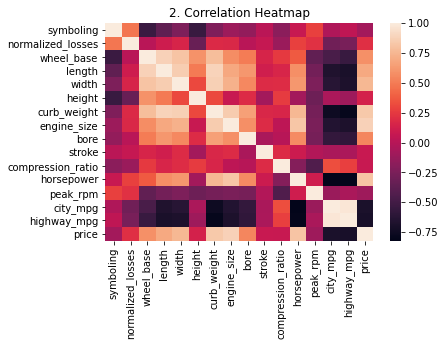

In [460]:
sns.heatmap(df.corr(), annot=False)
plt.title('2. Correlation Heatmap')
plt.show()

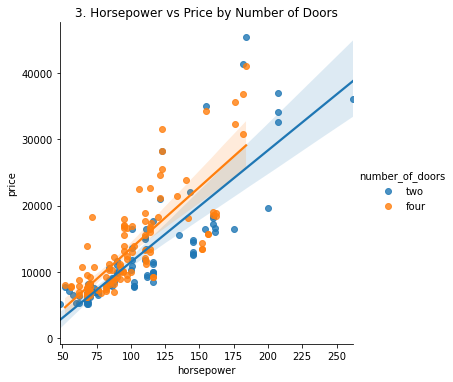

In [461]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='number_of_doors',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='3. Horsepower vs Price by Number of Doors')

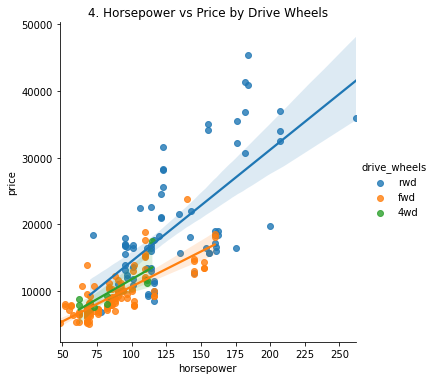

In [462]:
g = sns.lmplot(
    data=df,
    x='horsepower', y='price', hue='drive_wheels',
    height=5
)

g.set(xlabel='horsepower', ylabel='price', title='4. Horsepower vs Price by Drive Wheels')

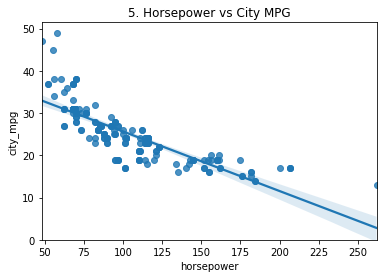

In [463]:
sns.regplot(x='horsepower', y='city_mpg', data=df)
plt.title('5. Horsepower vs City MPG')
plt.ylim(0)
plt.show()

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

## 📝Resposta

### 1. Horsepower vs Price
- O preço médio dos veículos a diesel tende a ser maior que o preço médio dos veículos a gasolina. Porém, os veículos de maior valor são majoritariamente a gasolina.

### 2. Correlation Heatmap
- Existe uma forte correlação entre o comprimento e a largura dos veículos, já que em geral seguem a mesma proporção.

### 3. Horsepower vs Price by Number of Doors
- A quantidade de portas não impacta diretamente no preço.

### 4. Horsepower vs Price by Drive Wheels
- Carros que tem maior preço e potência são em sua maioria de tração traseira

### 5. Horsepower vs City MPG
- O rendimento de um veículo em milhas por galão em ambiente urbano é inversamente proporcional a sua potência, ou seja, um veículo mais potente tem um rendimento menor. Essa afirmação também se aplica no rendimento de veículos em rodovias.

## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [465]:
# Faz a soma de todos os valores nulos
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

## 📝Resposta
- Não há valores nulos ou ausentes em nenhum dos atributos. A coluna symboling apresenta valores "0" (zero) pois seu intervalo intervalo varia de -3 a 3, expressando o grau de risco de seguro do veículo, o que é um dado válido.

### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

## 📝Resposta

In [466]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_numeric_columns = df[[
    'symboling', 
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg']]

df_price = df['price']

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=100, random_state=1)

pred = iforest.fit_predict(df_numeric_columns)

outlier_index = pred != -1
df_without_outliers = df[outlier_index]
df_without_outliers

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

## 📝Resposta


Após implementarmos o algoritmo seguindo a orientação do artigo [4 Machine learning techniques for outlier detection in Python](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d), o resultado demonstrou a presença de outliers. O método escolhido para tratamento dos dados utilizou o algoritmo IsolationForest e após a identificação dos dados discrepantes removeu-os do dataframe. A quantidade de registros da tabela diminuiu de 201 para 191.

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [467]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

#LabelEncoder
labelEncoderDoors = LabelEncoder()
labelEncoderDoors.fit_transform(df['number_of_doors'])

labelEncoderCylinders = LabelEncoder()
labelEncoderCylinders.fit_transform(df['number_of_cylinders'])

#OneHotEncoder
makeOneHotEncoder = OneHotEncoder()
make_ohe = makeOneHotEncoder.fit_transform(df[['make']]).toarray()
make_ohe = pd.DataFrame(make_ohe, columns=["make: "+str(int(i)) for i in range(make_ohe.shape[1])])

fuel_typeOneHotEncoder = OneHotEncoder()
fuel_type_ohe = fuel_typeOneHotEncoder.fit_transform(df[['fuel_type']]).toarray()
fuel_type_ohe = pd.DataFrame(fuel_type_ohe, columns=["fuel_type: "+str(int(i)) for i in range(fuel_type_ohe.shape[1])])

aspirationOneHotEncoder = OneHotEncoder()
aspiration_ohe = aspirationOneHotEncoder.fit_transform(df[['aspiration']]).toarray()
aspiration_ohe = pd.DataFrame(aspiration_ohe, columns=["aspiration: "+str(int(i)) for i in range(aspiration_ohe.shape[1])])

bodyStyleOneHotEncoder = OneHotEncoder()
body_style_ohe = bodyStyleOneHotEncoder.fit_transform(df[['body_style']]).toarray()
body_style_ohe = pd.DataFrame(body_style_ohe, columns=["body_style: "+str(int(i)) for i in range(body_style_ohe.shape[1])])

drive_wheelsOneHotEncoder = OneHotEncoder()
drive_wheels_ohe = drive_wheelsOneHotEncoder.fit_transform(df[['drive_wheels']]).toarray()
drive_wheels_ohe = pd.DataFrame(drive_wheels_ohe, columns=["drive_wheels: "+str(int(i)) for i in range(drive_wheels_ohe.shape[1])])

engine_locationOneHotEncoder = OneHotEncoder()
engine_location_ohe = engine_locationOneHotEncoder.fit_transform(df[['engine_location']]).toarray()
engine_location_ohe = pd.DataFrame(engine_location_ohe, columns=["engine_location: "+str(int(i)) for i in range(engine_location_ohe.shape[1])])

engine_typeOneHotEncoder = OneHotEncoder()
engine_type_ohe = engine_typeOneHotEncoder.fit_transform(df[['engine_type']]).toarray()
engine_type_ohe = pd.DataFrame(engine_type_ohe, columns=["engine_type: "+str(int(i)) for i in range(engine_type_ohe.shape[1])])

fuel_systemOneHotEncoder = OneHotEncoder()
fuel_system_ohe = fuel_systemOneHotEncoder.fit_transform(df[['fuel_system']]).toarray()
fuel_system_ohe = pd.DataFrame(fuel_system_ohe, columns=["fuel_system: "+str(int(i)) for i in range(fuel_system_ohe.shape[1])])

dataframe = df.drop(['price'], axis=1)

# LabelEncoder
dataframe['number_of_doors'] = labelEncoderDoors.transform(
    dataframe['number_of_doors'])

dataframe['number_of_cylinders'] = labelEncoderCylinders.transform(
    dataframe['number_of_cylinders'])

# OneHotEncoder
make_ohe = makeOneHotEncoder.transform(dataframe[['make']]).toarray()
make_ohe = pd.DataFrame(
    make_ohe, columns=["make: "+str(int(i)) for i in range(make_ohe.shape[1])])

fuel_type_ohe = fuel_typeOneHotEncoder.transform(
    dataframe[['fuel_type']]).toarray()
fuel_type_ohe = pd.DataFrame(fuel_type_ohe, columns=[
                            "fuel_type: "+str(int(i)) for i in range(fuel_type_ohe.shape[1])])

aspiration_ohe = aspirationOneHotEncoder.transform(
    dataframe[['aspiration']]).toarray()
aspiration_ohe = pd.DataFrame(aspiration_ohe, columns=[
                                "aspiration: "+str(int(i)) for i in range(aspiration_ohe.shape[1])])

body_style_ohe = bodyStyleOneHotEncoder.transform(
    dataframe[['body_style']]).toarray()
body_style_ohe = pd.DataFrame(body_style_ohe, columns=[
                            "body_style: "+str(int(i)) for i in range(body_style_ohe.shape[1])])

drive_wheels_ohe = drive_wheelsOneHotEncoder.transform(
    dataframe[['drive_wheels']]).toarray()
drive_wheels_ohe = pd.DataFrame(drive_wheels_ohe, columns=[
                                "drive_wheels: "+str(int(i)) for i in range(drive_wheels_ohe.shape[1])])

engine_location_ohe = engine_locationOneHotEncoder.transform(
    dataframe[['engine_location']]).toarray()
engine_location_ohe = pd.DataFrame(engine_location_ohe, columns=[
                                    "engine_location: "+str(int(i)) for i in range(engine_location_ohe.shape[1])])

engine_type_ohe = engine_typeOneHotEncoder.transform(
    dataframe[['engine_type']]).toarray()
engine_type_ohe = pd.DataFrame(engine_type_ohe, columns=[
                                "engine_type: "+str(int(i)) for i in range(engine_type_ohe.shape[1])])

fuel_system_ohe = fuel_systemOneHotEncoder.transform(
    dataframe[['fuel_system']]).toarray()
fuel_system_ohe = pd.DataFrame(fuel_system_ohe, columns=[
                                "fuel_system: "+str(int(i)) for i in range(fuel_system_ohe.shape[1])])

dataframe = pd.concat([
    dataframe,
    make_ohe,
    fuel_type_ohe,
    aspiration_ohe,
    body_style_ohe,
    drive_wheels_ohe,
    engine_location_ohe,
    engine_type_ohe,
    fuel_system_ohe], axis=1)

dataframe = dataframe.drop([
    'make',
    'fuel_type',
    'aspiration',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'fuel_system'
], axis=1)

df_cleaned = scaler.fit_transform(dataframe[dataframe.columns])

In [468]:
# Utilizando o MinMaxScaler para escalonar os dados entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0,1))

df_cleaned_scaler = scaler.fit_transform(df_cleaned)
df_cleaned_scaler

array([[1.        , 0.53926702, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.53926702, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.53926702, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.15706806, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.        , ..., 1.        , 0.        ,
        0.        ]])

**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

## 📝Resposta

Utilizando o código:

In [469]:
df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make                 201 non-null    object
 1   fuel_type            201 non-null    object
 2   aspiration           201 non-null    object
 3   number_of_doors      201 non-null    object
 4   body_style           201 non-null    object
 5   drive_wheels         201 non-null    object
 6   engine_location      201 non-null    object
 7   engine_type          201 non-null    object
 8   number_of_cylinders  201 non-null    object
 9   fuel_system          201 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


De acordo com os resultados obtidos após a aplicação do método info() ao dataframe, os atributos não numéricos são:

- make
- fuel_type
- aspiration
- number_of_doors
- body_style
- drive_wheels
- engine_location
- engine_type
- number_of_cylinders
- fuel_system

Fizemos a exclusão dos atributos numéricos ("int64" e "float64") para poder visualizar os outros tipos de dados disponíveis para a análise.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

## 📝Resposta

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

## 📝Resposta

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

## 📝Resposta

Algoritmos escolhidas para testar a performance:

1. Random Forest Regressor
2. Linear Regression 
3. Ridge Regression

**Pergunta:** Explique como cada algoritmo funciona.



## 📝Resposta

### 1. Random Forest Regressor 
- Random Forest é um algoritmo de aprendizado supervisionado que utiliza uma árvore de decisão para classificar dados. É utilizado o sistema de votos, em que selecionamos a melhor árvore para cada conjunto de dados.

### 2. Linear Regression
- Linear Regression é um algoritmo utilizado para estimar o valor de uma variável dependente (y) a partir de uma ou mais variáveis independentes (x). Essa regressão é aplicada quando a relação de resposta entre as variáveis descreve uma função linear. Ele utiliza os pontos de dados para estimar os coeficientes da função linear.

### 3. Ridge Regression
- Ridge Regression é um algoritmo de regressão linear que utiliza a regularização Ridge para estimar os coeficientes da função linear. Ele é utilizado quando a relação de resposta entre as variáveis descreve uma função linear.

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [470]:
Y = df['price']
X = df_cleaned

Divida o subset em conjunto de treinamento e teste.

In [471]:
from sklearn.model_selection import train_test_split

# Separação utilizando a divisão 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

### Algoritmo 1

In [472]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X_train, y_train)

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)

predict = randomForestRegressor.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(randomForestRegressor, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio + KFold: ", scores.mean())


R2-score:  0.8989950995057878
RMSE:  2239.0569877471708
MAE:  1469.7548497267758
R2-score médio + KFold:  0.9215934060666037


### Algoritmo 2

In [473]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

predict = linearRegression.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('MAE: ', mean_absolute_error(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))

scores = cross_val_score(linearRegression, X, y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio + KFold: ", scores.mean())


R2-score:  -6.596328055869981e+22
MAE:  399480251684275.7
RMSE:  1809443587733527.0
R2-score médio + KFold:  -2.5256791002610895e+23


### Algoritmo 3

In [474]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

predict = ridge.predict(X_test)
print("R2-score: ", r2_score(y_test, predict))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)))
print('MAE: ', mean_absolute_error(y_test, predict))

scores = cross_val_score(ridge, X, Y,
                         cv=crossvalidation, scoring='r2')
print("R2-score médio + KFold: ", scores.mean())


R2-score:  0.8991881939892169
RMSE:  2236.915723400755
MAE:  1752.0854979187282
R2-score médio + KFold:  0.9116134515276733


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

## 📝Resposta

# ATUALIZA 💾⚠

### 1. Random Forest Regressor
- R2-score: 0.8880181340958897
- RMSE: 2357.5872519629293
- MAE: 1521.2418961748633
- R2-score médio + KFold: 0.9198338437468697

### 2. Linear Regression
- R2-score: 0.8701131808376099
- RMSE: 2003.388581772015
- MAE: 2539.080472075106
- R2-score médio + KFold: 0.8794613157151125

### 3. Ridge
- R2-score: 0.911444401495142
- RMSE: 2096.5341260710143
- MAE: 1678.188908429422
- R2-score médio + KFold: 0.9187794845554063

Os modelos tiveram um resultado muito bom, com uma performance semelhante entre si. Dentre eles, o modelo Ridge obteve um melhor resultado de R2-score. A Rigde Regression é um modelo de predição que calibra os coeficientes apartir dos seus quadrados, e dessa forma privilegia atributos relacionados mantendo coeficientes parecidos.

A Random Forest Regressor, mesmo não tendo um melhor resultado de R2-score, ainda se saiu bem no treinamento. Por conta do modelo de decisão deste modelo, onde se baseia nos vários dados e pega as informações mais relevantes para criar regras, assim refinando o modelo de aprendizado.

A Linear Regression obteve o pior resultado comparado aos demais. Com seu MAE (Mean Absolut Error) mais alto que os demais e seu Score R2 negativo. O que mostra que o modelo linear não representa bem a tendência de valores do dataset.

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

## 📝Resposta

Segundo a documentação das duas técnicas utilizadas, a RandomSearchCV é uma técnica de busca aleatória, que utiliza um conjunto de parâmetros aleatórios para ajustar o modelo. A GridSearchCV é uma técnica de busca em grade, que utiliza um conjunto de parâmetros fixos para ajustar o modelo. Para o nosso caso pela quantidade de parâmetros foi escolhido o RandomSearchCV, pois ele realiza um menor número de iterações, e aumenta as chances de encontrar os parâmetros ideias para o modelo com menor uso de poder computacional.

### Algoritmo 1

In [475]:
randomForestRegressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [476]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, 130],
    'max_features': [2, 3, 5],
    'n_estimators': [20, 50, 100, 200, 400],
    'oob_score': [True, False]
}

randomSearchCv = RandomizedSearchCV(
    estimator=randomForestRegressor, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhores Parâmetros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

Melhores Parâmetros:  {'oob_score': True, 'n_estimators': 100, 'max_features': 5, 'max_depth': 120, 'bootstrap': True}
Melhor score:  0.9261820025508293


### Algoritmo 2

In [477]:
linearRegression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [478]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'copy_X': [True],
    'fit_intercept': [True],
    'n_jobs': [10, 20, 30],
    'positive': [True, False],
    'normalize': [True, False],
}

randomSearchCv = RandomizedSearchCV(
    estimator=linearRegression, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhores Parâmetros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

Melhores Parâmetros:  {'positive': True, 'normalize': True, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': True}
Melhor score:  0.896677628099227


### Algoritmo 3

In [479]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [480]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
    'copy_X': [True],
    'fit_intercept': [True],
    'normalize': [True, False],
    'max_iter': [10, 1000, 1500]
}

randomSearchCv = RandomizedSearchCV(
    estimator=ridge, param_distributions=param_grid, cv=crossvalidation, scoring='r2', n_iter=10)
randomSearchCv.fit(X, Y)

print('Melhores Parâmetros: ', randomSearchCv.best_params_)
print('Melhor score: ', randomSearchCv.best_score_)

Melhores Parâmetros:  {'normalize': False, 'max_iter': 1000, 'fit_intercept': True, 'copy_X': True, 'alpha': 1}
Melhor score:  0.9116134515276733


C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.52934e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\jjean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.15214e-17): result may not be accurate.
  overwrite_a=True).T


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|        |   RandomForestRegressor     |     LinearRegression        |                        Ridge                                  |
|:-------|:---------------------------:|:---------------------------:|:-------------------------------------------------------------:|
| treino |      {'oob_score': False, 'n_estimators': 100, 'max_features': 3, 'max_depth': 110, 'bootstrap': True}                      |     {'positive': True, 'normalize': False, 'n_jobs': 20, 'fit_intercept': True, 'copy_X': True}                     | {'normalize': False, 'max_iter': 1500, 'fit_intercept': True, 'copy_X': True, 'alpha': 1} |
| teste  |      0.9221944608992022                      |       0.9064481240176022        |  0.9187794845554063


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

## 📝Resposta

O algoritmo que obteve o melhor resultado de acordo com a nossa implementação foi o Random Forest Regressor, visto que apresentou o maior valor do atributo "best_score_" dentre os três analisados. Por se tratar de uma generalização de árvores de decisão, esse algoritmo minimiza o overfitting dos modelos individuais para as entradas e com isso apresenta resultados mais robustos e complexos.

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [481]:
randomForest = RandomForestRegressor(
    oob_score=False,
    n_estimators=200, 
    max_features=5,
    max_depth=120,
    bootstrap=True)

randomForest.fit(X, Y)

RandomForestRegressor(max_depth=120, max_features=5, n_estimators=200)

### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [482]:
def transform(dataframe):
    # LabelEncoder
    dataframe['number_of_doors'] = labelEncoderDoors.fit_transform(dataframe['number_of_doors'])
    
    dataframe['number_of_cylinders'] = labelEncoderCylinders.transform(
        dataframe['number_of_cylinders'])

    # OneHotEncoder
    make_ohe = makeOneHotEncoder.transform(dataframe[['make']]).toarray()
    make_ohe = pd.DataFrame(
        make_ohe, columns=["make: "+str(int(i)) for i in range(make_ohe.shape[1])])

    fuel_type_ohe = fuel_typeOneHotEncoder.transform(
        dataframe[['fuel_type']]).toarray()
    fuel_type_ohe = pd.DataFrame(fuel_type_ohe, columns=[
                               "fuel_type: "+str(int(i)) for i in range(fuel_type_ohe.shape[1])])

    aspiration_ohe = aspirationOneHotEncoder.transform(
        dataframe[['aspiration']]).toarray()
    aspiration_ohe = pd.DataFrame(aspiration_ohe, columns=[
                                 "aspiration: "+str(int(i)) for i in range(aspiration_ohe.shape[1])])

    body_style_ohe = bodyStyleOneHotEncoder.transform(
        dataframe[['body_style']]).toarray()
    body_style_ohe = pd.DataFrame(body_style_ohe, columns=[
                                "body_style: "+str(int(i)) for i in range(body_style_ohe.shape[1])])

    drive_wheels_ohe = drive_wheelsOneHotEncoder.transform(
        dataframe[['drive_wheels']]).toarray()
    drive_wheels_ohe = pd.DataFrame(drive_wheels_ohe, columns=[
                                  "drive_wheels: "+str(int(i)) for i in range(drive_wheels_ohe.shape[1])])

    engine_location_ohe = engine_locationOneHotEncoder.transform(
        dataframe[['engine_location']]).toarray()
    engine_location_ohe = pd.DataFrame(engine_location_ohe, columns=[
                                     "engine_location: "+str(int(i)) for i in range(engine_location_ohe.shape[1])])

    engine_type_ohe = engine_typeOneHotEncoder.transform(
        dataframe[['engine_type']]).toarray()
    engine_type_ohe = pd.DataFrame(engine_type_ohe, columns=[
                                 "engine_type: "+str(int(i)) for i in range(engine_type_ohe.shape[1])])

    fuel_system_ohe = fuel_systemOneHotEncoder.transform(
        dataframe[['fuel_system']]).toarray()
    fuel_system_ohe = pd.DataFrame(fuel_system_ohe, columns=[
                                 "fuel_system: "+str(int(i)) for i in range(fuel_system_ohe.shape[1])])

    dataframe = pd.concat([
        dataframe,
        make_ohe,
        fuel_type_ohe,
        aspiration_ohe,
        body_style_ohe,
        drive_wheels_ohe,
        engine_location_ohe,
        engine_type_ohe,
        fuel_system_ohe], axis=1)

    dataframe = dataframe.drop([
        'make',
        'fuel_type',
        'aspiration',
        'body_style',
        'drive_wheels',
        'engine_location',
        'engine_type',
        'fuel_system'
    ], axis=1)

    scaled_data = scaler.transform(dataframe[dataframe.columns])

    return pd.DataFrame(scaled_data, columns=dataframe.columns)

In [483]:
df_cleaned_x = df.drop(['price'], axis=1)

vehicle1 = pd.DataFrame([[-1, 50, 'renault', 'gas', 'std', 'two', 'hatchback', 'fwd', 'front', 89.7, 161, 66, 52.3, 1837, 'ohc', 'four', 79,  '1bbl', 2.91, 3.07, 10.1, 80, 5500, 38, 42]], columns=df_cleaned_x.columns)
vehicle2 = pd.DataFrame([[1, 100, 'audi', 'gas', 'std', 'four', 'sedan', '4wd', 'front', 111.2, 176.8, 64.8, 54.3, 2710, 'ohc', 'six', 164, 'mpfi', 3.31, 3.19, 9, 120, 4250, 21, 28]], columns=df_cleaned_x.columns)
vehicle3 = pd.DataFrame([[3, 150, 'alfa-romero', 'gas', 'turbo', 'two', 'sedan', 'rwd', 'rear', 103, 191.7, 70.6, 47.8, 3950, 'ohcv', 'twelve', 326, 'mpfi', 3.54, 2.76, 11.5, 200, 5000, 13, 17]], columns=df_cleaned_x.columns)

vehicle1 = transform(vehicle1)
vehicle2 = transform(vehicle2)
vehicle3 = transform(vehicle3)

predictvehicle1 = randomForest.predict(vehicle1)
predictvehicle2 = randomForest.predict(vehicle2)
predictvehicle3 = randomForest.predict(vehicle3)

print("O valor do veículo (Baixo custo): ", predictvehicle1[0])
print("O valor do veículo (Médio custo): ", predictvehicle2[0])
print("O valor do veículo (Alto custo): ", predictvehicle3[0])

O valor do veículo (Baixo custo):  24832.84
O valor do veículo (Médio custo):  26883.9
O valor do veículo (Alto custo):  29896.331666666665


**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

## 📝Resposta

Como resultado obtivemos:

- Valor do veículo 1 [Baixo custo]: $ 23603.94

- Valor do veículo 2 [Médio custo]: $ 26589.54

- Valor do veículo 3 [Alto custo]:  $ 28063.12

Sim, os valores estão dentro das faixas esperadas.

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Após os desenvolvimentos realizados, o resultado do modelo está coerente com as categorias de preço estipuladas, em que veículos com caraterísticas mais básicas apresentam valores menores que veículos de mais alto padrão. O intervalo de valores ainda pode ser melhorado com testes nos parâmetros do modelo para melhor representar um cenário real. 

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Aplicaríamos uma maior diversidade de modelos de regressão para verificar se algum se adequaria melhor ao contexto dos dados, análise de outras técnicas de tratamento de outliers, como por exemplo Elliptic Envelope e Local Outlier, o tuning do algoritmo com outras combinações de parâmetros e a técnica de PCA para reducação da dimensionalidade do conjunto de dados.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: Como o objetivo deste modelo de aprendizado de máquina é calcular o valor de uma variável numérica referente ao preço de um veículo, sendo um dado não categórico, um modelo de classificação não se aplica. Caso estivessemos tentando identificar o público alvo ideal para um veículo, por exemplo, o modelo de classificação se aplicaria.

## Referências

- [https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)
- [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
- [https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)